# import

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import StandardScaler 
from imblearn.over_sampling import SMOTE


# result

all the data

Accuracy: 92.29%

 Training Accuracy score: 0.9995805369127517
Testing Accuracy score: 0.9229480737018425
classification_report 
               precision    recall  f1-score   support

         0.0       0.89      0.92      0.90       239
         1.0       0.94      0.93      0.94       358

    accuracy                           0.92       597
   macro avg       0.92      0.92      0.92       597
weighted avg       0.92      0.92      0.92       597



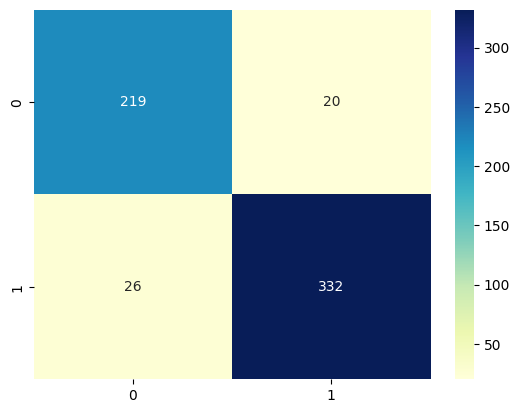

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/cleandata.csv')
# tl = TomekLinks()
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
# x, y = tl.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf= RandomForestClassifier(random_state=42)
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

- random undersimpling

Accuracy: 91.00%

 Training Accuracy score: 0.9989539748953975
Testing Accuracy score: 0.9100418410041841
classification_report 
               precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       239
         1.0       0.93      0.88      0.91       239

    accuracy                           0.91       478
   macro avg       0.91      0.91      0.91       478
weighted avg       0.91      0.91      0.91       478



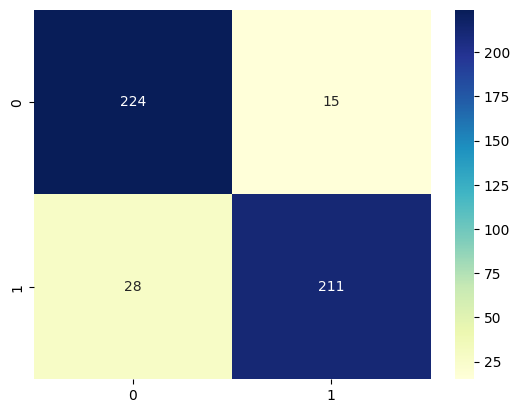

In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/cleandata.csv')

df1=data1[data1.IsABot== 1].head(1195)
df2=data1[data1.IsABot== 0].head(1195)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
   
    ('rf',  RandomForestClassifier(random_state=42)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

- random undersimpling + StandardScaler

Accuracy: 84.52%

 Training Accuracy score: 0.9989539748953975
Testing Accuracy score: 0.8451882845188284
classification_report 
               precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       239
         1.0       0.85      0.84      0.84       239

    accuracy                           0.85       478
   macro avg       0.85      0.85      0.85       478
weighted avg       0.85      0.85      0.85       478



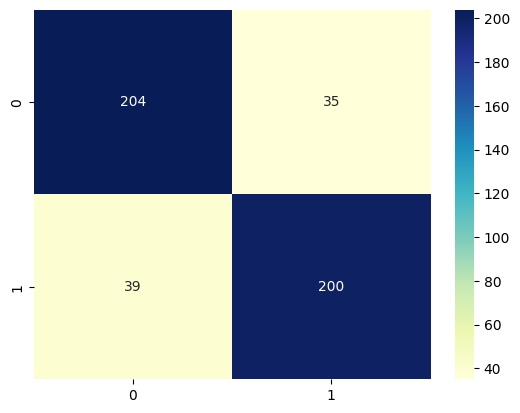

In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/cleandata.csv')

df1=data1[data1.IsABot== 1].head(1195)
df2=data1[data1.IsABot== 0].head(1195)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  RandomForestClassifier(random_state=42)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

tomklink undersimpling

Accuracy: 93.80%

 Training Accuracy score: 0.9982773471145564
Testing Accuracy score: 0.9380378657487092
classification_report 
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       239
         1.0       0.95      0.95      0.95       342

    accuracy                           0.94       581
   macro avg       0.94      0.94      0.94       581
weighted avg       0.94      0.94      0.94       581



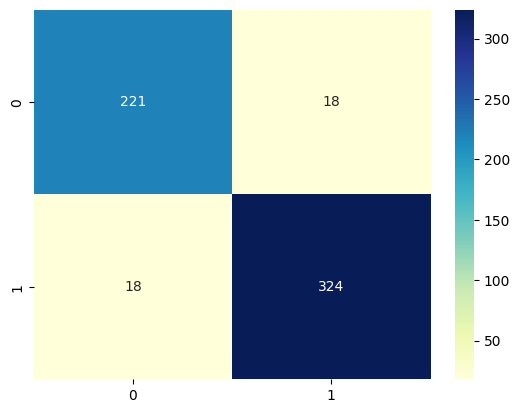

In [5]:
import numpy as np # linear algebra
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks

df = pd.read_csv('./Data/cleandata.csv')

tl = TomekLinks()
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x, y = tl.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf = Pipeline([
    
    ('rf',  RandomForestClassifier(random_state=42)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

tomlink + random undersimpling

Accuracy: 93.80%

 Training Accuracy score: 0.9982773471145564
Testing Accuracy score: 0.9380378657487092
classification_report 
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       239
         1.0       0.95      0.95      0.95       342

    accuracy                           0.94       581
   macro avg       0.94      0.94      0.94       581
weighted avg       0.94      0.94      0.94       581



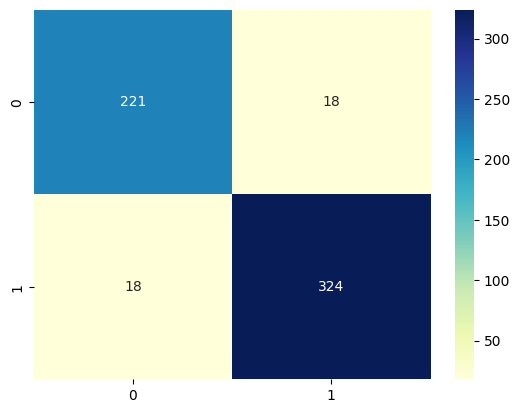

In [6]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
from sklearn.pipeline import Pipeline
df = pd.read_csv('./Data/cleandata.csv')
tl = TomekLinks()
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()

x, y = tl.fit_resample(x, y)
# Convert the list to a DataFrame
y = pd.DataFrame({'IsABot': y})

# Concatenate the two DataFrames
data = pd.concat([x, y], axis=1)
df1=data[data.IsABot== 1].head(11543)
df2=data[data.IsABot== 0].head(11543)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf = Pipeline([
    
    ('rf',  RandomForestClassifier(random_state=42)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

-oversimpling

Accuracy: 93.29%

 Training Accuracy score: 0.9989499474973749
Testing Accuracy score: 0.9328671328671329
classification_report 
               precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       358
         1.0       0.95      0.91      0.93       357

    accuracy                           0.93       715
   macro avg       0.93      0.93      0.93       715
weighted avg       0.93      0.93      0.93       715



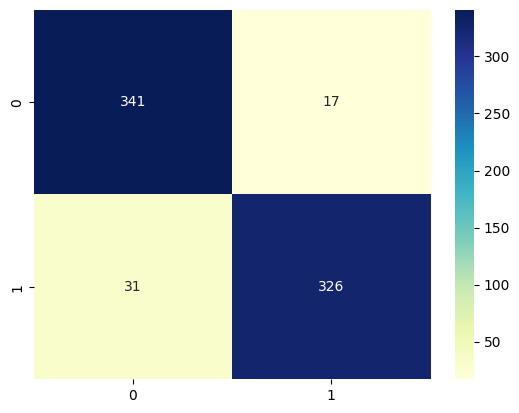

In [7]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
df = pd.read_csv('./Data/cleandata.csv')
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
   
    ('rf',  RandomForestClassifier(random_state=42)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

# feat_importances = pd.Series(pipeline['rf'].feature_importances_, index=x.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# with features selection

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/cleandata.csv')
data1=data1.loc[:,['HasProfilePicture', 'following', 'follower',
       'HasAccountDescription', 'likes', 'posts', 'AverageNumberOfHashtags',
       'AverageNumberOfComments', 'AverageNumberOfShare',
       'AverageNumberOfLikes', 'AverageNumberOfLinkedProfiles',
       'AverageNumberOfViews', 'IsABot']]




- random undersimpling 

Accuracy: 90.79%

 Training Accuracy score: 0.9989539748953975
Testing Accuracy score: 0.9079497907949791
classification_report 
               precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       239
         1.0       0.93      0.88      0.91       239

    accuracy                           0.91       478
   macro avg       0.91      0.91      0.91       478
weighted avg       0.91      0.91      0.91       478



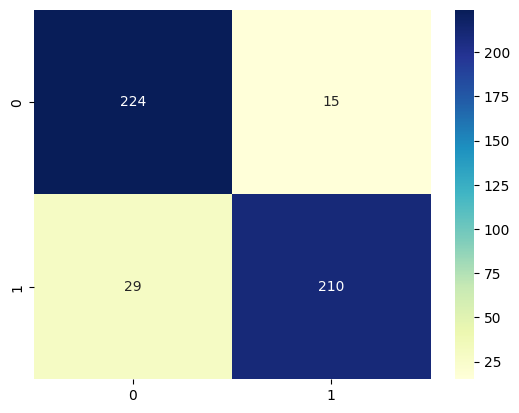

In [9]:
df1=data1[data1.IsABot== 1].head(1195)
df2=data1[data1.IsABot== 0].head(1195)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
   
    ('rf',  RandomForestClassifier(random_state=42)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

- oversimpling

Accuracy: 92.87%

 Training Accuracy score: 0.9989499474973749
Testing Accuracy score: 0.9286713286713286
classification_report 
               precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       358
         1.0       0.95      0.90      0.93       357

    accuracy                           0.93       715
   macro avg       0.93      0.93      0.93       715
weighted avg       0.93      0.93      0.93       715



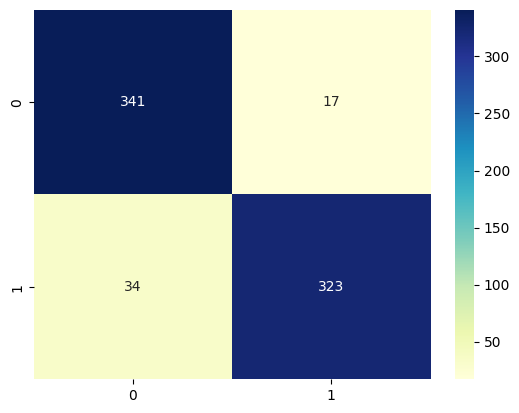

In [10]:
from imblearn.over_sampling import SMOTE
df=data1
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()

smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
  
    ('rf',  RandomForestClassifier(random_state=42)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)
cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

tomklink undersimpling

Accuracy: 93.29%

 Training Accuracy score: 0.9982773471145564
Testing Accuracy score: 0.9328743545611016
classification_report 
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       239
         1.0       0.94      0.94      0.94       342

    accuracy                           0.93       581
   macro avg       0.93      0.93      0.93       581
weighted avg       0.93      0.93      0.93       581



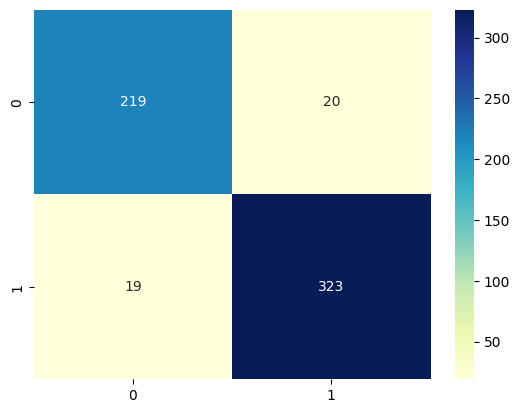

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df=data1
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
clf = Pipeline([
   
    ('rf',  RandomForestClassifier(random_state=42)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

# hyperparametre


In [13]:
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
df = pd.read_csv('./Data/cleandata.csv')
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
# Create a logistic regression pipeline with StandardScaler
pipe = Pipeline([
   
    ('logreg', RandomForestClassifier(random_state=42))
])
n_estimators_list = list(range(10,220,50))
criterion_list = ['gini', 'entropy']
max_depth_list = list(range(5,41,10))
max_depth_list.append(None)
min_samples_split_list = [x/1000 for x in list(range(5, 41, 10))]
min_samples_leaf_list = [x/1000 for x in list(range(5, 41, 10))]
max_features_list = ['sqrt', 'log2']
params_grid = {
    'logreg__n_estimators': n_estimators_list,
    'logreg__criterion': criterion_list,
    'logreg__max_depth': max_depth_list,
    'logreg__min_samples_split': min_samples_split_list,
    'logreg__min_samples_leaf': min_samples_leaf_list,
    'logreg__max_features': max_features_list
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, params_grid, cv=3)
grid_search.fit(x ,y)

grid_search.best_params_

{'logreg__criterion': 'entropy',
 'logreg__max_depth': 25,
 'logreg__max_features': 'sqrt',
 'logreg__min_samples_leaf': 0.005,
 'logreg__min_samples_split': 0.005,
 'logreg__n_estimators': 60}

Accuracy: 91.19%

 Training Accuracy score: 0.9191459572978649
Testing Accuracy score: 0.9118881118881119
classification_report 
               precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       358
         1.0       0.91      0.92      0.91       357

    accuracy                           0.91       715
   macro avg       0.91      0.91      0.91       715
weighted avg       0.91      0.91      0.91       715



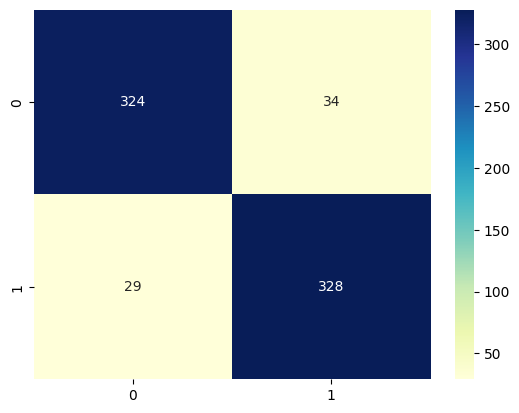

In [14]:
{'logreg__criterion': 'entropy',
 'logreg__max_depth': 25,
 'logreg__max_features': 'sqrt',
 'logreg__min_samples_leaf': 0.005,
 'logreg__min_samples_split': 0.005,
 'logreg__n_estimators': 60}
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/cleandata.csv')
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([

    ('rf',  RandomForestClassifier(random_state=42,criterion= 'entropy',max_depth= 25,max_features= 'sqrt',min_samples_leaf= 0.005,min_samples_split= 0.005, n_estimators= 60)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

#  cross validation

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
df = pd.read_csv('./Data/cleandata.csv')
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
k_folds = KFold(n_splits = 10)
clf= RandomForestClassifier(random_state=42)
scores = cross_val_score(clf, x, y, cv = k_folds)
print("Average CV Score: ", scores.mean())
# Average CV Score:  0.9308483169804236 /93

Average CV Score:  0.9308483169804236
